# **Bloom Analysis - Red_Maple_Colored**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings("ignore")

## Open file and load data

In [ ]:
# download the csv file
pheno_red_maple_colored_leaves = "https://drive.usercontent.google.com/download?id=1AuoxnOtVjuSUBgoop2EYuGEyc8A9rnQP&export=download&authuser=0&confirm=t&uuid=5ffbe48c-bcd3-4f7c-9b10-32df8977d94f&at=APZUnTW-gQZXRNLHbocL9PRTO5-d:1715039954146"
original_data = pd.read_csv(pheno_red_maple_colored_leaves)

In [ ]:
# presere a copy of the original data
df = original_data.copy()
# view the first five entries of the dataset
df = df.rename(columns = {'Colored_Lvs_Mean_DOY':'DOY'})
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY
0,Acer,rubrum,443,PPN_9200010,MI,2011,292.333333
1,Acer,rubrum,443,PPN_9200010,MI,2012,291.400000
2,Acer,rubrum,443,PPN_9200010,MI,2013,285.647059
3,Acer,rubrum,443,PPN_9200010,MI,2014,282.333333
4,Acer,rubrum,443,PPN_9200010,MI,2015,288.888889


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Genus      512 non-null    object 
 1   Species    512 non-null    object 
 2   Site_ID    512 non-null    int64  
 3   Site_Name  512 non-null    object 
 4   State      512 non-null    object 
 5   Year       512 non-null    int64  
 6   DOY        512 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 28.1+ KB


## Unique Genera

1 unique genera:
['Acer']


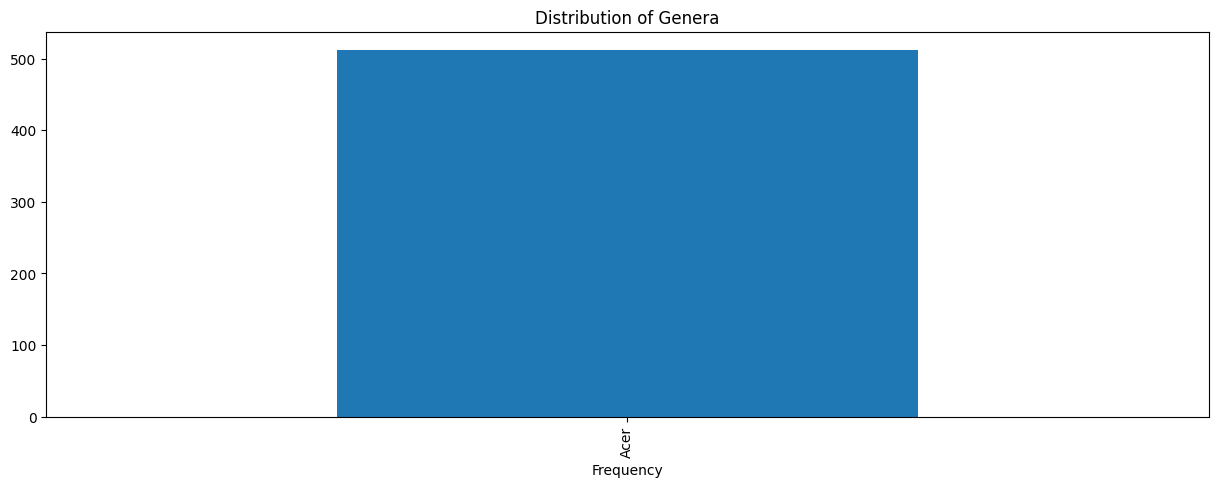

In [ ]:
genus_list = df['Genus'].unique()

plt.figure(figsize = (15,5))
print(len(genus_list), 'unique genera:')
print(genus_list)
df['Genus'].value_counts().plot.bar()
plt.xlabel('Frequency')
plt.title('Distribution of Genera')
plt.show()

## Unique Species

1 unique species:
['rubrum']


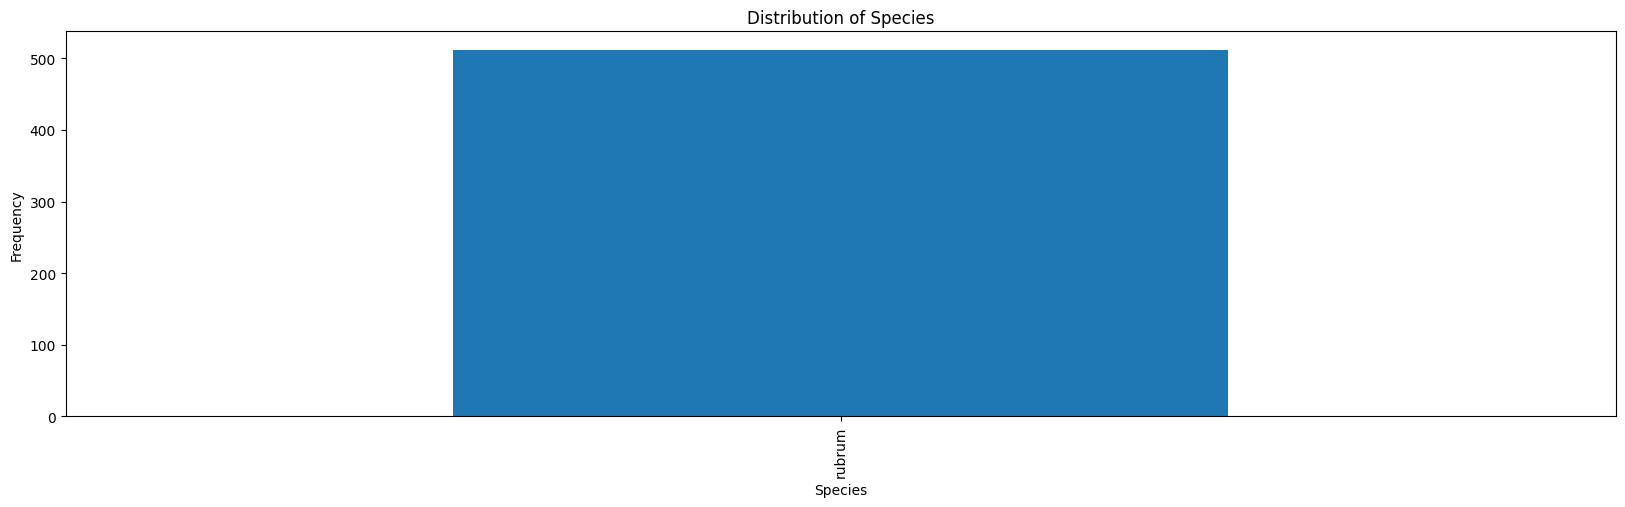

In [ ]:
specie_list = df['Species'].unique()

print(len(specie_list), 'unique species:')
print(specie_list)

plt.figure(figsize=(20,5))
df['Species'].value_counts().plot.bar()
plt.ylabel('Frequency')
plt.title('Distribution of Species')
plt.show()

## Sites and States

In [ ]:
state_counts = df['State'].value_counts().reset_index()
print('state_counts: \n',state_counts.sort_values('count', ascending=False).head().to_markdown(),'\n')
state_sites = df.groupby('State')['Site_Name'].nunique().reset_index()
print('state_sites: \n',state_sites.sort_values('Site_Name', ascending = False).head().to_markdown())

state_counts: 
 |    | State   |   count |
|---:|:--------|--------:|
|  0 | NY      |     122 |
|  1 | NH      |      91 |
|  2 | MN      |      79 |
|  3 | MA      |      59 |
|  4 | ME      |      42 | 

state_sites: 
 |    | State   |   Site_Name |
|---:|:--------|------------:|
|  8 | NY      |          13 |
|  5 | MN      |          10 |
|  7 | NH      |          10 |
|  2 | MA      |           8 |
| 10 | VA      |           5 |


In [ ]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_sites['State'],
    z=state_sites['Site_Name'],
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Count'
))

fig.update_layout(
    title_text='Prevalence of Sites by State',
    geo_scope='usa'
)

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_counts['State'],
    z=state_counts['count'],
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Count'
))

fig.update_layout(
    title_text='Prevalence of Data Points by State',
    geo_scope='usa'
)

fig.show()

### List of All Sites by State

In [ ]:
# print all site names by state
df.groupby('State')['Site_Name'].value_counts()

State  Site_Name                                          
CT     Burlingham_west                                        12
IL     backyard                                                9
MA     HARV_053.phenology.phe_primary                          9
       back_yard                                               8
       Big_Meadow_North                                        8
       Lily_Pond                                               7
       Ecology_Phenology_Project                               7
       First_Meadow                                            7
       Red_Maple_1_9                                           7
       Long_Pond_P1_Low_                                       6
ME     my_back_yard                                           13
       My_yard                                                11
       Rachel_Carson_National_Wildlife_Refuge_Headquarters    10
       Sues_site                                               8
MI     PPN_9200010             

# Form groups based on unique combinations of genus, species, location

In [ ]:
# create a new column to capture the categories the entry pertains to
categories = []
for ind in df.index:
  category = (df['Genus'][ind],df['Species'][ind], df['Site_Name'][ind], df['State'][ind])
  categories.append(category)
df['categories'] = categories

In [ ]:
# view the new column
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
0,Acer,rubrum,443,PPN_9200010,MI,2011,292.333333,"(Acer, rubrum, PPN_9200010, MI)"
1,Acer,rubrum,443,PPN_9200010,MI,2012,291.400000,"(Acer, rubrum, PPN_9200010, MI)"
2,Acer,rubrum,443,PPN_9200010,MI,2013,285.647059,"(Acer, rubrum, PPN_9200010, MI)"
3,Acer,rubrum,443,PPN_9200010,MI,2014,282.333333,"(Acer, rubrum, PPN_9200010, MI)"
4,Acer,rubrum,443,PPN_9200010,MI,2015,288.888889,"(Acer, rubrum, PPN_9200010, MI)"


In [ ]:
category_list = df.categories.unique()
print('There are',len(category_list),'unique cominations of genus, species, and site in the data')

There are 61 unique cominations of genus, species, and site in the data


## Map each group to the subset of data that it consists of

In [ ]:
# create hash map to map unique categories to the data points falling into those categories
categorized_data = {}

# # for each category group observed in df, map the associated data to the category group
for category in category_list:


  criteria1 = df['Genus'] == category[0]
  criteria2 = df['Species'] == category[1]
  criteria3 = df['Site_Name'] == category[2]
  criteria4 = df['State'] == category[3]


  categorized_data.update({category:df[criteria1 & criteria2 & criteria3 & criteria4]})



## Visualize an Example

In [ ]:
# enter search criteria
genus = 'Acer'
species = 'rubrum'
site = 'PPN_9200010'
state = 'MI'

# view data associated with a given category group
example_data = categorized_data.get((genus, species, site, state))
example_data

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
0,Acer,rubrum,443,PPN_9200010,MI,2011,292.333333,"(Acer, rubrum, PPN_9200010, MI)"
1,Acer,rubrum,443,PPN_9200010,MI,2012,291.400000,"(Acer, rubrum, PPN_9200010, MI)"
2,Acer,rubrum,443,PPN_9200010,MI,2013,285.647059,"(Acer, rubrum, PPN_9200010, MI)"
3,Acer,rubrum,443,PPN_9200010,MI,2014,282.333333,"(Acer, rubrum, PPN_9200010, MI)"
4,Acer,rubrum,443,PPN_9200010,MI,2015,288.888889,"(Acer, rubrum, PPN_9200010, MI)"
5,Acer,rubrum,443,PPN_9200010,MI,2016,297.545455,"(Acer, rubrum, PPN_9200010, MI)"
6,Acer,rubrum,443,PPN_9200010,MI,2017,287.727273,"(Acer, rubrum, PPN_9200010, MI)"
7,Acer,rubrum,443,PPN_9200010,MI,2018,291.571429,"(Acer, rubrum, PPN_9200010, MI)"
8,Acer,rubrum,443,PPN_9200010,MI,2019,287.750000,"(Acer, rubrum, PPN_9200010, MI)"
9,Acer,rubrum,443,PPN_9200010,MI,2020,293.888889,"(Acer, rubrum, PPN_9200010, MI)"


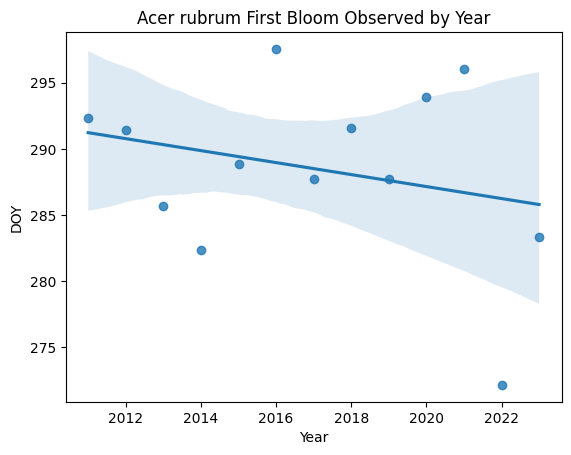

In [ ]:
sns.regplot(example_data, x=example_data['Year'], y=example_data['DOY'])
plt.title(f'{genus} {species} First Bloom Observed by Year')
plt.show()

## Calculate Pearson correlation coefficient

In [ ]:
x=example_data['Year']
y=example_data['DOY']

round(x.corr(y),4)

-0.2625

# Perform regression and calculate relevant stats for all 61 unique groups

In [ ]:
#create a list of the various category groups and a separte list of their respective correlations
category_groups = []
pearson_correlations = []
kendall_taus = []
regression_scores = []
slopes=[]
p_values = []
observations = []
results2 = []

# loop through all unique catgory groupings
for category in category_list:
  example_data = categorized_data.get(category)
  x=example_data['Year']   #reshape x data to work with sklearn linear model
  y=example_data['DOY']
  correlation = round(x.corr(y),4)
  tau, p_value = stats.kendalltau(x, y)


  #run the regression via statsmodel
  x = sm.add_constant(x)
  est = sm.OLS(y,x)
  est2 = est.fit()
  if len(est2.params) >= 2:
    slopes.append(round(est2.params[1],4))
  else:
    slopes.append(pd.NA)

  p_values.append(round(est2.pvalues[0],4))
  regression_scores.append(round(est2.rsquared,4))

  category_groups.append(category)
  pearson_correlations.append(correlation)
  kendall_taus.append(round(tau,4))
  observations.append(len(example_data['Year']))


correlation_df = pd.DataFrame({
    'dataset' : 'red_maple',
    'event' : 'colored leaves',
    'grouping':category_groups,
    'observations':observations,
    'Pearson r': pearson_correlations,
    'Kendall τ': kendall_taus,
    'slope':slopes,
    'R²' : regression_scores,
    'p-value':p_values
})


In [ ]:
# drop all rows containing NaN values (these result from instances where there is only one DOY observation)
correlation_df = correlation_df.dropna()

# view and save the dataframe
correlation_df.to_csv('/content/drive/MyDrive/Projects/Bloom Project/stats/redmaple_colored_stats.csv', index=False) #running this line requires that you mount your drive!
print(correlation_df.to_string())
print(len(correlation_df), 'total instances')

      dataset           event                                                                 grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
0   red_maple  colored leaves                                          (Acer, rubrum, PPN_9200010, MI)            13    -0.2625    -0.0769  -0.4524  0.0689   0.2600
1   red_maple  colored leaves                                          (Acer, rubrum, PPN_9239908, MO)             6     0.6108     0.4667   3.4545  0.3731   0.2140
2   red_maple  colored leaves                                             (Acer, rubrum, backyard, IL)             9    -0.5458    -0.4444  -3.7684  0.2979   0.1176
3   red_maple  colored leaves                                             (Acer, rubrum, backyard, MI)            13     0.1458     0.0256   0.2562  0.0213   0.8340
4   red_maple  colored leaves                                      (Acer, rubrum, Spicebush_Trail, NY)            11    -0.0893    -0.0182  -0.2917  0.0080   0.6983
5   red_ma

In [ ]:
correlation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,60.0,8.500000,2.310624,3.0000,7.000000,8.50000,10.000000,13.0000
Pearson r,60.0,-0.054403,0.442818,-0.8994,-0.447625,-0.04360,0.251225,0.8485
Kendall τ,60.0,-0.024177,0.330503,-0.9048,-0.238100,0.01110,0.169900,0.7143
slope,60.0,-0.306713,3.855094,-12.9912,-1.629650,-0.13260,0.594825,13.7500
R²,60.0,0.195777,0.213437,0.0001,0.018100,0.12585,0.322875,0.8089
p-value,60.0,0.458615,0.318971,0.0046,0.190700,0.37015,0.783925,0.9768


### Restict observations to instances that saw a p-value < .05
#### Sorted by p-value


In [ ]:
significant = correlation_df[correlation_df['p-value']<.05].sort_values('p-value')
print(significant.to_string())
print(len(significant), 'instances in total')

      dataset           event                          grouping  observations  Pearson r  Kendall τ   slope      R²  p-value
50  red_maple  colored leaves     (Acer, rubrum, Lily_Pond, MA)             7    -0.8994    -0.9048 -2.3648  0.8089   0.0046
15  red_maple  colored leaves  (Acer, rubrum, First_Meadow, MA)             7    -0.8892    -0.7143 -3.0486  0.7906   0.0061
18  red_maple  colored leaves  (Acer, rubrum, my_back_yard, ME)            13     0.6686     0.4516  7.3377  0.4470   0.0137
22  red_maple  colored leaves     (Acer, rubrum, back_yard, MA)             8    -0.7866    -0.6429 -1.5996  0.6188   0.0146
53  red_maple  colored leaves   (Acer, rubrum, Phudd_Hill_, NY)             7     0.8485     0.7143  1.5566  0.7200   0.0221
5 instances in total


### Descriptive Statistics of Instance with p-value < .05:

In [ ]:
significant.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,5.0,8.40000,2.607681,7.0000,7.0000,7.0000,8.0000,13.0000
Pearson r,5.0,-0.21162,0.889016,-0.8994,-0.8892,-0.7866,0.6686,0.8485
Kendall τ,5.0,-0.21922,0.744327,-0.9048,-0.7143,-0.6429,0.4516,0.7143
slope,5.0,0.37626,4.272059,-3.0486,-2.3648,-1.5996,1.5566,7.3377
R²,5.0,0.67706,0.148693,0.4470,0.6188,0.7200,0.7906,0.8089
p-value,5.0,0.01222,0.007089,0.0046,0.0061,0.0137,0.0146,0.0221


###Significant Instances with Positive Slope:

In [ ]:
positive_slopes = significant[significant['slope']>0].sort_values('slope')
print(positive_slopes.sort_values('slope', ascending = False).to_string())

      dataset           event                          grouping  observations  Pearson r  Kendall τ   slope     R²  p-value
18  red_maple  colored leaves  (Acer, rubrum, my_back_yard, ME)            13     0.6686     0.4516  7.3377  0.447   0.0137
53  red_maple  colored leaves   (Acer, rubrum, Phudd_Hill_, NY)             7     0.8485     0.7143  1.5566  0.720   0.0221


### Descriptive Statistics of Positively Sloped Instances:

In [ ]:
positive_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,2.0,10.00000,4.242641,7.0000,8.500000,10.00000,11.500000,13.0000
Pearson r,2.0,0.75855,0.127209,0.6686,0.713575,0.75855,0.803525,0.8485
Kendall τ,2.0,0.58295,0.185757,0.4516,0.517275,0.58295,0.648625,0.7143
slope,2.0,4.44715,4.087855,1.5566,3.001875,4.44715,5.892425,7.3377
R²,2.0,0.58350,0.193040,0.4470,0.515250,0.58350,0.651750,0.7200
p-value,2.0,0.01790,0.005940,0.0137,0.015800,0.01790,0.020000,0.0221


### Significant Instances with Negative Slope:

In [ ]:
negative_slopes = significant[significant['slope']<0].sort_values('slope')
print(negative_slopes.sort_values('slope').to_string())

      dataset           event                          grouping  observations  Pearson r  Kendall τ   slope      R²  p-value
15  red_maple  colored leaves  (Acer, rubrum, First_Meadow, MA)             7    -0.8892    -0.7143 -3.0486  0.7906   0.0061
50  red_maple  colored leaves     (Acer, rubrum, Lily_Pond, MA)             7    -0.8994    -0.9048 -2.3648  0.8089   0.0046
22  red_maple  colored leaves     (Acer, rubrum, back_yard, MA)             8    -0.7866    -0.6429 -1.5996  0.6188   0.0146


### Descriptive Statistics of Negatively Sloped Instances:

In [ ]:
negative_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,3.0,7.333333,0.577350,7.0000,7.00000,7.0000,7.50000,8.0000
Pearson r,3.0,-0.858400,0.062389,-0.8994,-0.89430,-0.8892,-0.83790,-0.7866
Kendall τ,3.0,-0.754000,0.135388,-0.9048,-0.80955,-0.7143,-0.67860,-0.6429
slope,3.0,-2.337667,0.724881,-3.0486,-2.70670,-2.3648,-1.98220,-1.5996
R²,3.0,0.739433,0.104871,0.6188,0.70470,0.7906,0.79975,0.8089
p-value,3.0,0.008433,0.005393,0.0046,0.00535,0.0061,0.01035,0.0146


### Positive/Negative Slope Count

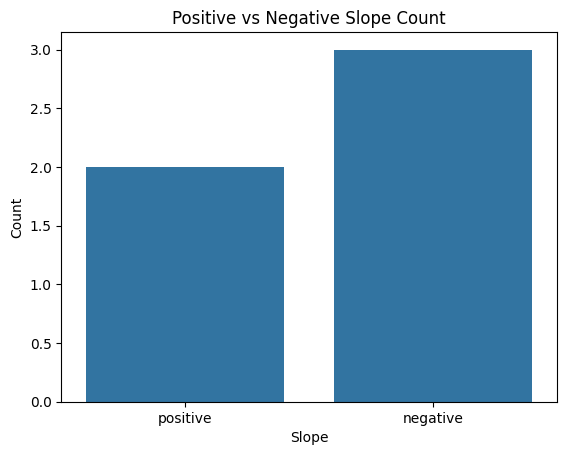

Number of positive slope examples: 2
Number of negative slope examples: 3


In [ ]:
# Create a DataFrame
df = pd.DataFrame({
    'Array': ['positive', 'negative'],
    'Length': [len(positive_slopes), len(negative_slopes)]
})

# Create the plot
plot = sns.barplot(x='Array', y='Length', data=df)

# Set the title
plot.set_title('Positive vs Negative Slope Count')

# Set x and y-axis labels
plot.set_xlabel('Slope')
plot.set_ylabel('Count')

plt.show()

print('Number of positive slope examples:',len(positive_slopes))
print('Number of negative slope examples:',len(negative_slopes))

## 5, out of the original 61, groupings showed a statistically significant (p < .05) relationship between year and DOY


##2 have a positive slope
##3 have a negative slope